In [1]:
import molli as ml

br1 = r"/mnt/c/Users/rineharn/code/Lucid_Somnambulist/Lucid_Somnambulist/somn/data/rocheval_amine_conf_br_optgfn2.zip"
br2 = r"/mnt/c/Users/rineharn/code/Lucid_Somnambulist/Lucid_Somnambulist/somn/data/confs_br_optgfn2.zip"

col1 = ml.Collection.from_zip(br1)
col2 = ml.Collection.from_zip(br2)

print([f.name for f in col1.molecules])
print([f.name for f in col2.molecules])

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9']
['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [4]:
for mol in col1.molecules:
    atoms = [k.__getattribute__('symbol') for k in mol.atoms]
    if 'Br' not in atoms:
        print('non-br found',mol.name)
for mol in col2.molecules:
    atoms = [k.__getattribute__('symbol') for k in mol.atoms]
    if 'Br' not in atoms:
        print('non-br found',mol.name)
for mol in col2.molecules:    
    col1.add(mol)

print([k.name for k in col1.molecules])
print(len(col1.molecules))

for mol in col1:
    wr = mol.to_mol2()
    with open(fr"/mnt/c/Users/rineharn/workspace/outs/{mol.name}.mol2",'w') as k:
        k.write(wr)
    

# col1.to_zip('bromides_all_f.zip')

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
65


In [19]:
am1 = r"/mnt/c/Users/rineharn/code/Lucid_Somnambulist/Lucid_Somnambulist/somn/data/rocheval_amine_conf_am_optgfn2.zip"
am2 = r"/mnt/c/Users/rineharn/code/Lucid_Somnambulist/Lucid_Somnambulist/somn/data/confs_am_optgfn2.zip"

col3 = ml.Collection.from_zip(am1)
col4 = ml.Collection.from_zip(am2)

print([f.name for f in col3.molecules])
print([f.name for f in col4.molecules])

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9']
['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011']


In [20]:
for mol in col3.molecules:
    atoms = [k.__getattribute__('symbol') for k in mol.atoms]
    if 'Br' in atoms:
        print('br found',mol.name)
        
for mol in col4.molecules:
    atoms = [k.__getattribute__('symbol') for k in mol.atoms]
    if 'Br' in atoms:
        print('br found',mol.name)
        
for mol in col4.molecules:    
    col3.add(mol)

print([k.name for k in col3.molecules])
print(len(col3.molecules))

# col3.to_zip('amines_all_f.zip')

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011']
61


## Looking at ASO variance vs max-min differences

In [1]:
import pandas as pd
cat = pd.read_csv(r"/mnt/c/Users/rineharn/code/Lucid_Somnambulist/Lucid_Somnambulist/somn/data/cat_aso_aeif_combined.csv",index_col=0,header=None)
var = cat.var(axis=0)
# print(var)
normvar = (var-var.min())/(var.max()-var.min())
# normvar.sort_values(ascending=False,inplace=True)

def max_diff(input):
    delta = input.max()-input.min()
    return delta

max_difference = cat.apply(max_diff,axis=0)
# max_difference.sort_values(ascending=False,inplace=True)
# print(max_difference)


In [2]:
import matplotlib.pyplot as plt

def get_frac_same(var,diff,frac=True):
    """
    Calculate fraction of intersection
    """
    no_int = len(list(set(var).intersection(set(diff))))
    tot = len(var)
    assert len(var) == len(diff)
    if frac == True:
        return no_int/tot
    else:
        return no_int
out = []
for i in list(range(6000))[1::3]:
    vars_ = normvar.index.to_list()[:i]
    diffs_ = max_difference.index.to_list()[:i]
    # print(diffs_,vars_)
    # print(i,get_frac_same(vars_,diffs_,frac=True))
    out.append([i,get_frac_same(vars_,diffs_,frac=True)])
    

# pd.DataFrame(out).to_csv('analysis_of_maxvar_vs_var.csv',header=True)



    

         x         y
0        1  0.000000
1        4  0.250000
2        7  0.142857
3       10  0.100000
4       13  0.076923
...    ...       ...
1995  5986  0.999833
1996  5989  1.000000
1997  5992  0.999666
1998  5995  0.999833
1999  5998  0.999667

[2000 rows x 2 columns]


<AxesSubplot: xlabel='x', ylabel='y'>

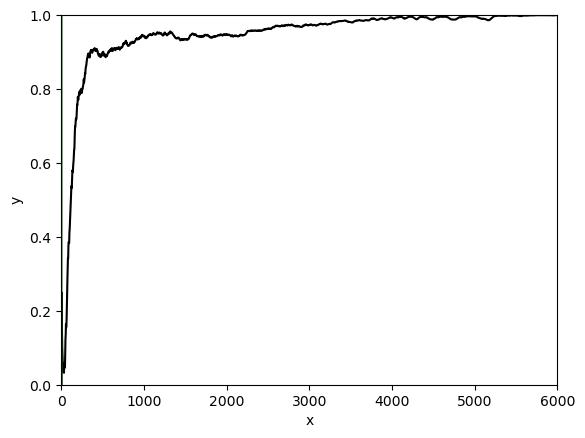

In [83]:
anal = pd.DataFrame(out,columns=['x','y'])
print(anal)
import seaborn as sns
g = sns.lineplot(anal,x='x',y='y',color='black')
g.set_ylim(0,1)
g.set_xlim(0,6000)
sns.lineplot(pd.DataFrame([[i,i] for i in range(6000)][::10],columns=['x','y']),x='x',y='y',color='darkgreen')


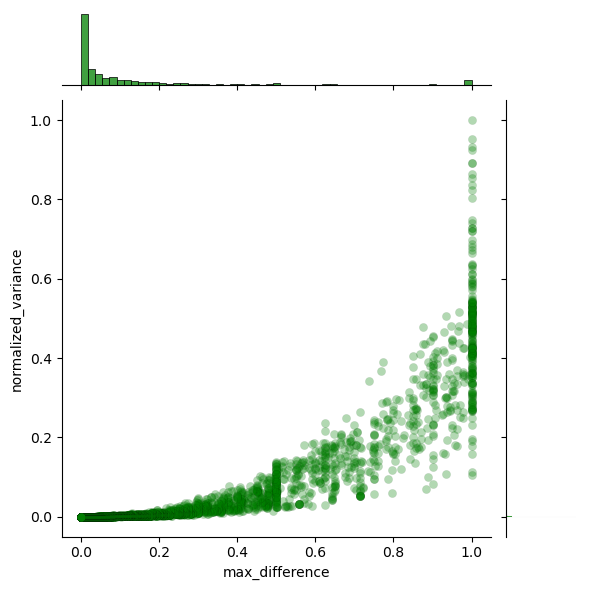

In [79]:
stack = pd.concat((max_difference,normvar),axis=1,ignore_index=False)
stack.columns=['max_difference','normalized_variance']
g = sns.jointplot(stack,x='max_difference',y='normalized_variance',edgecolor='black',linewidth=0.1,color='green',alpha=0.3)



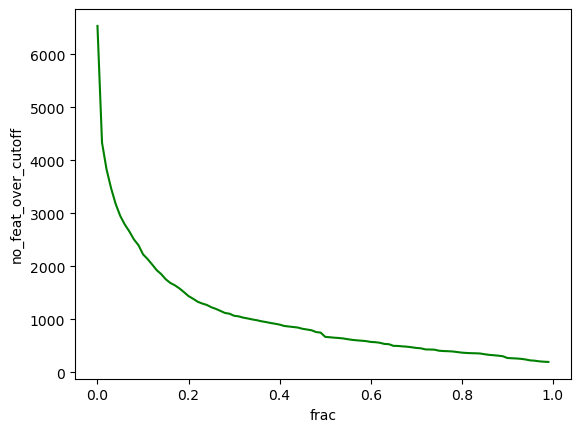

In [84]:
# print(len(max_difference[max_difference>0.1]))
out = []
for i in range(100):
    out.append([i/100,len(max_difference[max_difference>i/100])])
frac = pd.DataFrame(out,columns=['frac','no_feat_over_cutoff'])
g = sns.lineplot(frac,x='frac',y='no_feat_over_cutoff',color='green')

              data type
1554  1.000000e+00  max
2418  1.000000e+00  max
2514  1.000000e+00  max
2513  1.000000e+00  max
834   1.000000e+00  max
...            ...  ...
5964  1.996346e-11  var
5565  1.364426e-11  var
5273  1.335662e-12  var
3512  0.000000e+00  var
0              NaN  var

[13070 rows x 2 columns]
(13070, 3)


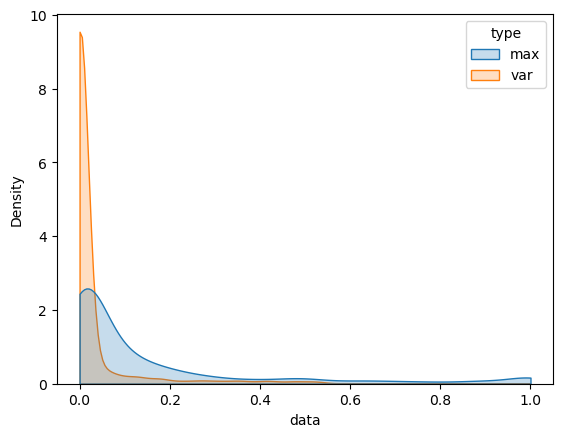

In [105]:
# tips = sns.load_dataset("tips")
# print(tips)
stack_concat = pd.concat(
    (pd.concat((max_difference,pd.Series(['max' for f in max_difference.values])),axis=1),
    pd.concat((normvar,pd.Series(['var' for f in normvar.values])),
    axis=1)),
    axis=0
)

stack_concat.columns=['data','type']
print(stack_concat)
stack_concat.reset_index(inplace=True)
print(stack_concat.shape)
k = sns.kdeplot(stack_concat,x='data',hue='type',color='darkgreen',fill='green',clip=(0,1))


In [10]:
import seaborn as sns
bars = max_difference.reset_index()
bars.columns=['gridpoint','difference']
# sns.barplot(bars,x='gridpoint',y='difference')

Apply VT to see which features are kept - THEN perform the masking/plotting

In [176]:
from copy import deepcopy
cat_copy = deepcopy(cat)
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
def _vt(df):
    _v = VarianceThreshold(threshold=0.04)
    scale = MinMaxScaler()
    sli = int(len(df.columns)/2)
    aso = df.iloc[:,:sli]
    aeif = df.iloc[:,sli:]
    aso = [f'aso_{f}' for f in aso.columns]
    aeif = [f'aeif_{f}' for f in aeif.columns]
    category = aso+aeif
    # print(category)
    temp = deepcopy(df)
    temp.columns=category
    temp_s = scale.fit_transform(temp)
    cat_v = _v.fit_transform(temp_s)
    cat_sel = pd.DataFrame(cat_v,index=temp.index,columns=temp.columns[_v._get_support_mask()])
    # print(temp.columns[_v._get_support_mask()])
    return cat_sel


def max_diff_sel(df,threshold = 0.80):
    """
    Threshold is percentile rank threshold for maximum differences calculated on each column.
    
    Max-Min for column = max difference (absolute value)
    All zeroes collapse to same percentile rank value, so threshold is NOT a percentage of the quantity of input features - this would
    only be true for an even distribution.
    """
    diff = df.apply(max_diff)
    diff.sort_values(inplace=True,ascending=False)
    ### Get percentile rank - select pct-based slice of features instead of number - like a threshold cutoff
    ranking = diff.rank(pct=True)
    idx = ranking[ranking>=threshold].index.to_list()
    return df[idx]        

def _maxdiff_then_scale(df,threshold=0.80,keyed=False):
    def pull_type_(df):
        labels = df.columns
        aeif_mask = [True if 'aeif' in f else False for f in labels]
        aso_mask = [True if 'aso' in f else False for f in labels]
        return df[df.columns[aso_mask]],df[df.columns[aeif_mask]]
    def diff_then_scale(df,threshold):
        temp_m = max_diff_sel(df,threshold)
        temp_sc = scale.fit_transform(temp_m)
        cat_sel = pd.DataFrame(temp_sc,index=temp_m.index,columns=temp_m.columns)
        return cat_sel
    scale = MinMaxScaler()
    sli = int(len(df.columns)/2)
    aso = df.iloc[:,:sli]
    aeif = df.iloc[:,sli:]
    aso = [f'aso_{f+1}' for f in range(sli)]
    aeif = [f'aeif_{f+1}' for f in range(sli)]
    category = aso+aeif
    # print(category)
    temp = deepcopy(df)
    temp.columns=category
    if type(threshold) == tuple:
        assert len(threshold) == 2
        asot,aeift = threshold
        aso_d,aeif_d = pull_type_(temp)
        aso_out = diff_then_scale(aso_d,asot)
        aeif_out = diff_then_scale(aeif_d,aeift)
        if keyed == True: out = pd.concat((aso_out,aeif_out),axis=1,keys=['aso','aeif'])
        else: out = pd.concat((aso_out,aeif_out),axis=1)
        return out
    else:
        out = diff_then_scale(temp,threshold)
        return out

# # ### DEBUG
# testing = _maxdiff_then_scale(cat_copy,(0.90,0.89))
# print(testing.columns)
# # print(testing[0].shape,testing[0].columns)
# # print(testing[1].shape,testing[1].columns)

In [133]:
def pull_type(df,query):
    labels = df['gridpoint']
    out = [True if query in f else False for f in labels]
    return out
import matplotlib.pyplot as plt
# cat_copy_pre = _vt(cat_copy)
cat_copy_pre = _maxdiff_then_scale(cat_copy,threshold=(0.91,0.88))
for cat_ in cat_copy_pre.index:
    catalyst = cat_copy_pre.loc[cat_,:]
    temp = catalyst.reset_index()
    temp.columns=['gridpoint','descriptor']    
    aeif_only = temp[pull_type(temp,'aeif')]['descriptor']
    aeif_scaled = (aeif_only - aeif_only.min())/(aeif_only.max()-aeif_only.min())
    # print(aeif_scaled.shape,aeif_only.shape)
    aeif_scaled_slice = pd.concat((temp[pull_type(temp,'aeif')]['gridpoint'],aeif_scaled),axis=1)
    aeif_scaled_slice['type'] = ['aeif' for f in range(len(aeif_scaled_slice.index))]
    aso_slice = temp[pull_type(temp,'aso')]
    aso_slice['type'] = ['aso' for f in aso_slice.index]
    aso_slice.reset_index(drop=True,inplace=True)
    aeif_scaled_slice.reset_index(drop=True,inplace=True)
    # print(aso_slice,aeif_scaled_slice)
    scaled_aeif_df = pd.concat((aso_slice,aeif_scaled_slice),axis=0)
    g = sns.stripplot(scaled_aeif_df,x='type',y='descriptor',color='purple')
    try:
        plt.savefig(f"/mnt/c/Users/rineharn/Pictures/scratch/{cat_}_asoandaeif.png",dpi=400)
    except:
        plt.savefig(f"{cat_}_asoandaeif.png",dpi=400)
    plt.clf()
    


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

Just plot non-VT features - many more of them.

In [ ]:
import matplotlib.pyplot as plt

for cat_ in cat_.index:
    catalyst = cat_.loc[cat_,:]
    temp = catalyst.reset_index()
    temp.columns=['gridpoint','descriptor']
    sli = int(len(temp)/2)
    ### DEBUG
    # aso = temp.iloc[:sli,:]
    # aeif = temp.iloc[sli:,:]
    # print(aso.shape,aeif.shape)
    aso = ['aso' for f in range(sli)]
    aeif = ['aeif' for f in range(sli)]
    category = aso+aeif
    temp['type']=category
    aeif_only = temp[temp['type']=='aeif']['descriptor']
    aeif_scaled = (aeif_only - aeif_only.min())/(aeif_only.max()-aeif_only.min())
    # print(aeif_scaled.shape,aeif_only.shape)
    aeif_scaled_slice = pd.concat((temp[temp['type']=='aeif']['gridpoint'],aeif_scaled),axis=1)
    aeif_scaled_slice['type'] = aeif
    # print(aeif_scaled_slice)
    aso_slice = temp[temp['type']=='aso']
    scaled_aeif_df = pd.concat((aso_slice,aeif_scaled_slice),axis=0)
    print(scaled_aeif_df)
    g = sns.stripplot(scaled_aeif_df,x='type',y='descriptor',color='purple')
    try:
        plt.savefig(f"/mnt/c/Users/rineharn/Pictures/scratch/{cat_}_asoandaeif.png",dpi=400)
    except:
        plt.savefig(f"{cat_}_asoandaeif.png",dpi=400)
    plt.clf()
    


      gridpoint  descriptor  type
0             1    0.000000   aso
1             2    0.000000   aso
2             3    0.000000   aso
3             4    0.000000   aso
4             5    0.000000   aso
...         ...         ...   ...
6529       6530    0.796907  aeif
6530       6531    0.796907  aeif
6531       6532    0.796907  aeif
6532       6533    0.796907  aeif
6533       6534    0.796907  aeif

[6534 rows x 3 columns]
      gridpoint  descriptor  type
0             1    0.000000   aso
1             2    0.000000   aso
2             3    0.000000   aso
3             4    0.000000   aso
4             5    0.000000   aso
...         ...         ...   ...
6529       6530    0.845516  aeif
6530       6531    0.845516  aeif
6531       6532    0.845516  aeif
6532       6533    0.845516  aeif
6533       6534    0.845516  aeif

[6534 rows x 3 columns]
      gridpoint  descriptor  type
0             1    0.000000   aso
1             2    0.000000   aso
2             3    0.000000   as

<Figure size 640x480 with 0 Axes>

VT removes most of AEIF descriptors before scaling is done. 

Trying max difference FIRST, with a specific cutoff for each ASO and AEIF - these are very different, and need some fine tuning. 

In [181]:
testing = _maxdiff_then_scale(cat_copy,(0.90,0.89),keyed=True)

# print(testing['aso'])

aso_frame = testing['aso']
aeif_frame = testing['aeif']
# print(aeif_frame)

# aso_idx = [int(f.split('_')[1]) for f in aso_frame.columns]
# aeif_idx = [int(f.split('_')[1]) for f in aeif_frame.columns]

# print(set(aso_idx))
# print(set(aeif_idx))
# print(set(aso_idx) & set(aeif_idx))
# print(cat_copy)
temp = deepcopy(cat_copy)
sli = int(len(temp.columns)/2)
aso_s = temp.iloc[:,:sli]
aeif_s = temp.iloc[:,sli:]
aso = [f'aso_{f+1}' for f in range(sli)]
aeif = [f'aeif_{f+1}' for f in range(sli)]
category = aso+aeif
temp.columns=category

# Want to get ASO and AEIF for same gridpoints to compare values
aso_selected_aeif = [f.replace('aso','aeif') for f in aso_frame.columns.to_list()]
aeif_selected_aso = [f.replace('aeif','aso') for f in aeif_frame.columns.to_list()]
# print(aeif_selected_aso)
### Selected gridpoints of OPPOSITE DESCRIPTOR to compare to feature selection output
y_aso = temp[aso_selected_aeif].to_numpy().flatten()
# print(y_aso)
y_aeif = temp[aeif_selected_aso].to_numpy().flatten()
# print(y_aeif)
x_aso = aso_frame.to_numpy().flatten()
x_aeif = aeif_frame.to_numpy().flatten()

df_aso = pd.concat((pd.Series(x_aso),pd.Series(y_aso)),axis=1)
df_aso.columns = ['selected_aso','aeif_values']
df_aeif = pd.concat((pd.Series(x_aeif),pd.Series(y_aeif)),axis=1)
df_aeif.columns = ['selected_aeif','aso_values']


In [188]:
plt.clf()
sns.scatterplot(df_aso,
                x='selected_aso',
                y='aeif_values',
                color='black'
                )
plt.savefig(f"/mnt/c/Users/rineharn/Pictures/scratch/aso_sel_gpts_aeifvsaso.png",dpi=400)
plt.clf()

sns.scatterplot(df_aeif,
                y='selected_aeif',
                x='aso_values',
                color='black')
plt.savefig(f"/mnt/c/Users/rineharn/Pictures/scratch/aeif_sel_gpts_aeifvsaso.png",dpi=400)
plt.clf()

<Figure size 640x480 with 0 Axes>

In [6]:
from somn.calculate.preprocess import preprocess_grid_maxdiff
from copy import deepcopy

cat_copy = deepcopy(cat)
output = preprocess_grid_maxdiff(cat_copy,threshold=(0.90,0.89))
# print(output.columns)

Index(['aso_1381', 'aso_2229', 'aso_2226', 'aso_2324', 'aso_2325', 'aso_1320',
       'aso_2225', 'aso_2543', 'aso_2544', 'aso_1366',
       ...
       'aeif_675', 'aeif_2424', 'aeif_1369', 'aeif_687', 'aeif_1549',
       'aeif_959', 'aeif_1378', 'aeif_1390', 'aeif_1757', 'aeif_1746'],
      dtype='object', length=687)
